###    Importamos librerías

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
sns.set_palette('Set2')

### Importamos los datos

In [3]:
#cargo archivo con ML de rotación realizado
df_rotacion = pd.read_excel("data_with_rotation.xlsx")

# Procesamiento de los datos

In [4]:
df_merged = df_rotacion.copy()

In [5]:
# Remover filas con valores NaN
df_merged = df_merged.dropna()

In [6]:
df_merged2 = df_merged.copy()

### Codificación de variables categóricas

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

col_names=df_merged.columns
for col in col_names:
     if df_merged2[col].dtype=="object":
            df_merged2[col]=encoder.fit_transform(df_merged2[col])

In [8]:
df_merged2.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Predicted_Labels
0,51,0,2,2,6,2,1,1,1,0,...,0,1,6,1,0,0,3,4,2,0
1,32,0,1,1,17,4,4,1,3,1,...,3,5,2,5,0,3,2,2,1,0
2,38,0,0,1,2,5,1,1,4,1,...,3,13,5,8,7,5,4,4,3,0


### Standard Scaler

Normalización de z, se utiliza para transformar características de un conjunto de datos para que tengan una media de 0 y una desviación estándar de 1. Este proceso ayuda a mejorar el rendimiento de varios algoritmos y modelos, especialmente aquellos que son sensibles a la escala de las características de entrada.

### Aplico standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que df_merged2 ya está definido y contiene tus datos

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Selecciona solo las columnas numéricas para escalar
numeric_columns = df_merged2.select_dtypes(include=['int', 'float']).columns

# Aplica StandardScaler a las columnas numéricas
df_merged2[numeric_columns] = scaler.fit_transform(df_merged2[numeric_columns])

### Calculamos la métrica Elbow que permite encontrar el K óptimo en el modelo K-means

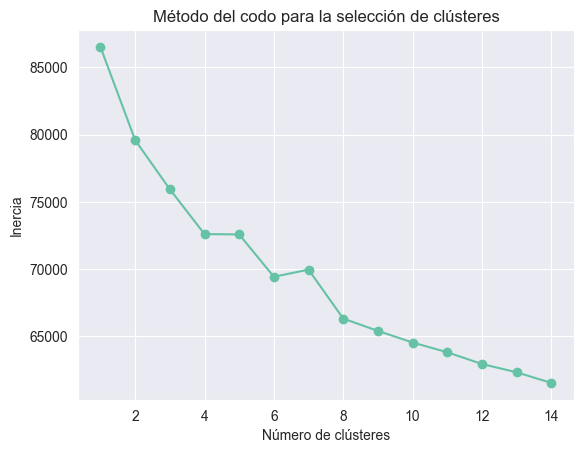

In [10]:
from sklearn.cluster import KMeans

inertia = []
num_clusters = range(1, 15)  # Probamos desde 1 hasta 10 clústeres

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_merged2)
    inertia.append(kmeans.inertia_)

# Graficamos la inercia en función del número de clústeres
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Método del codo para la selección de clústeres')
plt.show()

### El número óptimo de cluster es 5 - volvemos aplicar K-means con K = 5

In [11]:
# Definir el número de clústeres que deseas encontrar
num_clusters = 5
# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=num_clusters)
# Ajustar el modelo a los datos
kmeans.fit(df_merged2)
# Obtener las etiquetas de los clústeres asignados a cada muestra
cluster_labels = kmeans.labels_

In [12]:
# Agregar las etiquetas de los clústeres al DataFrame original
df_merged['Cluster'] = cluster_labels

In [13]:
#guardo el resultado en un archivo en excel
df_merged.to_excel('data_with_clusters.xlsx', index=False)

In [14]:
df_merged.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Predicted_Labels', 'Cluster'],
      dtype='object')

In [42]:
df_merged.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Predicted_Labels,Cluster
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,6,1,0,0,3,4,2,0,1
1,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,2,5,0,3,2,2,1,0,0
2,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13,5,8,7,5,4,4,3,0,0


## ANALISIS EXPLORATORIO DE LOS DATOS EDA

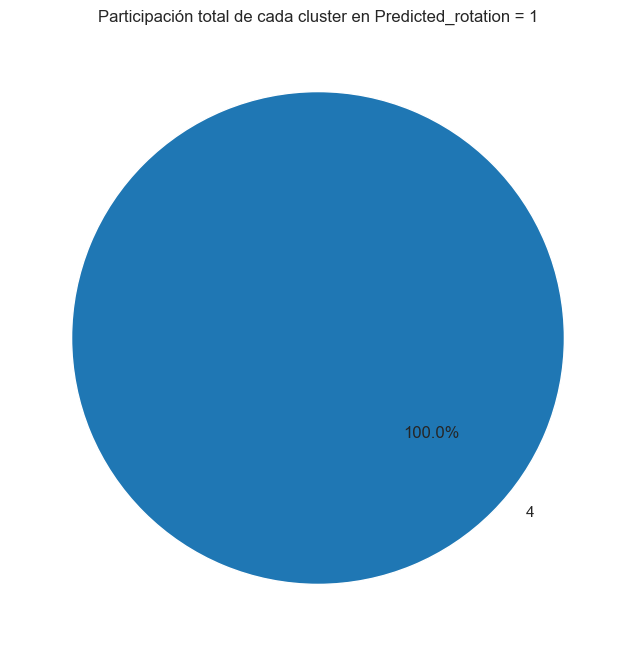

In [41]:
# Filtrar el DataFrame para incluir solo las filas donde Predicted_Labels es igual a 1
df_predicted_1 = df_merged[df_merged['Predicted_Labels'] == 1]

# Calcular la distribución total de Predicted_Labels=1 por cluster
cluster_predicted_counts_1 = df_predicted_1.groupby('Cluster').size()

# Graficar la participación total de cada cluster en Predicted_Labels=1
plt.figure(figsize=(8, 8))
plt.pie(cluster_predicted_counts_1, labels=cluster_predicted_counts_1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Participación total de cada cluster en Predicted_rotation = 1')
plt.show()

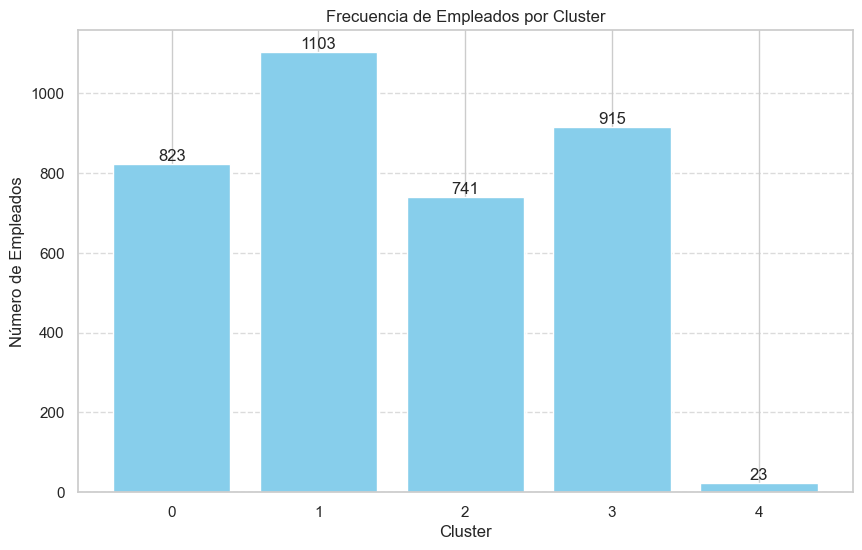

In [33]:
# Calcular la frecuencia de empleados por cluster
cluster_counts = df_merged['Cluster'].value_counts()

# Ordenar los clusters por número de empleados
cluster_counts = cluster_counts.sort_index()

# Graficar la frecuencia de empleados por cluster
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

# Agregar el valor de la cantidad en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Número de Empleados')
plt.title('Frecuencia de Empleados por Cluster')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

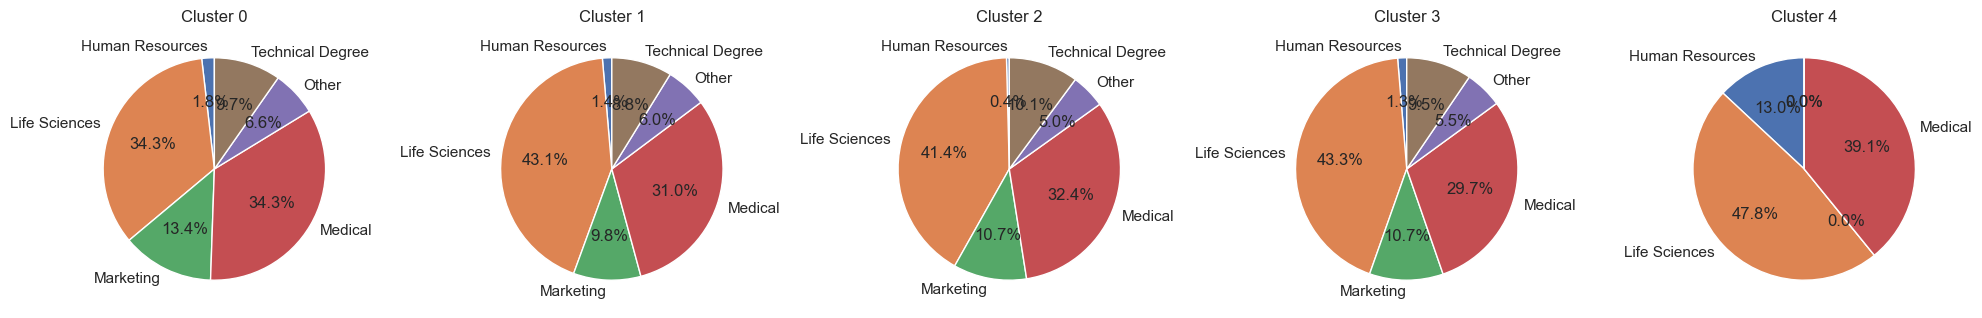

In [21]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'EducationField']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

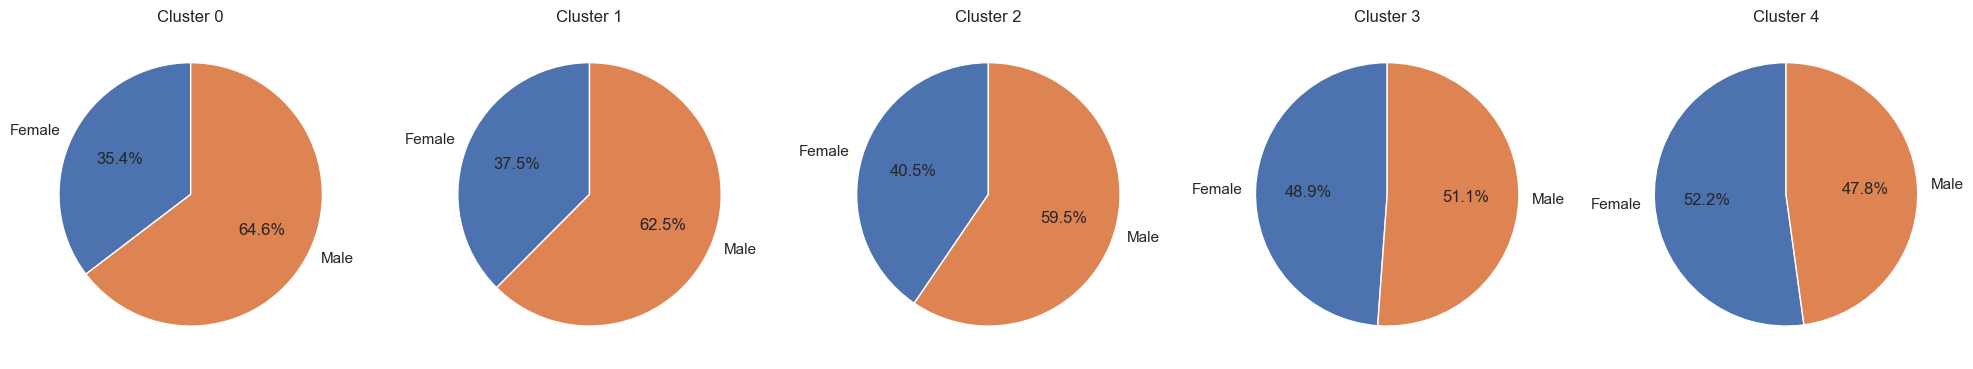

In [22]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'Gender']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

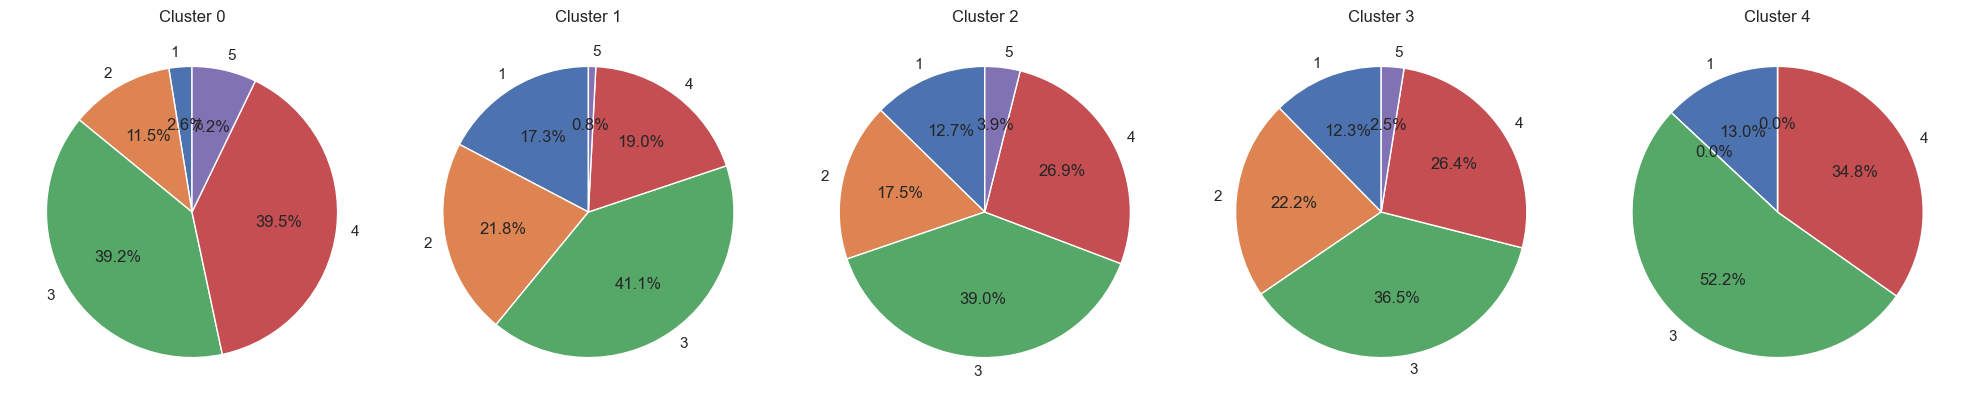

In [23]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'Education']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

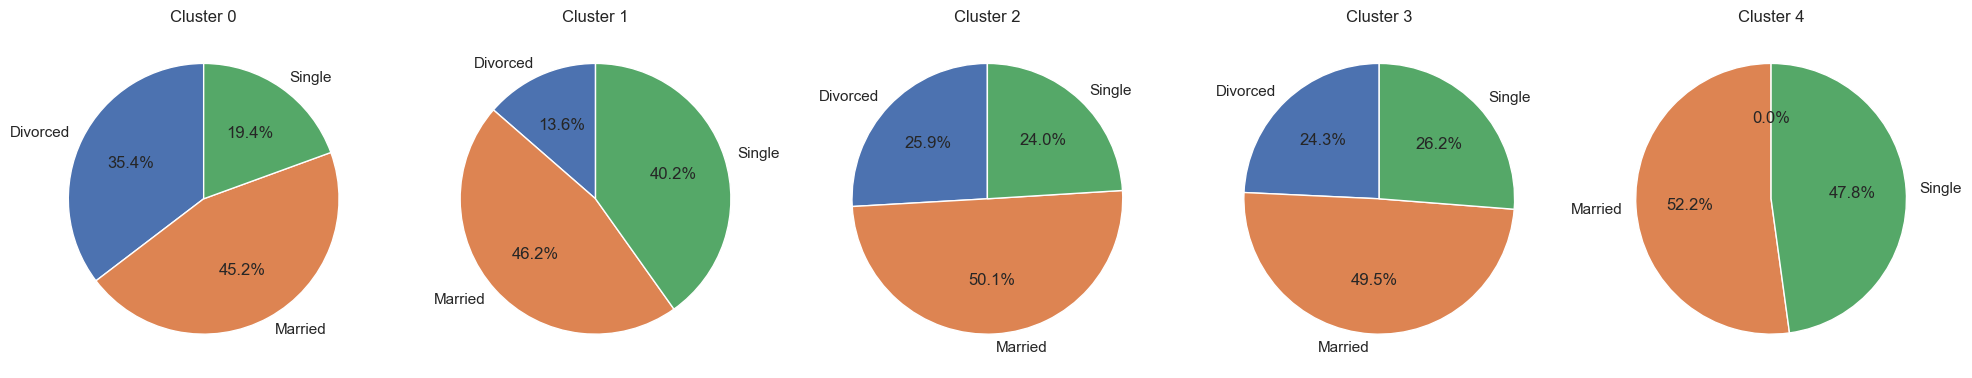

In [24]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'MaritalStatus']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

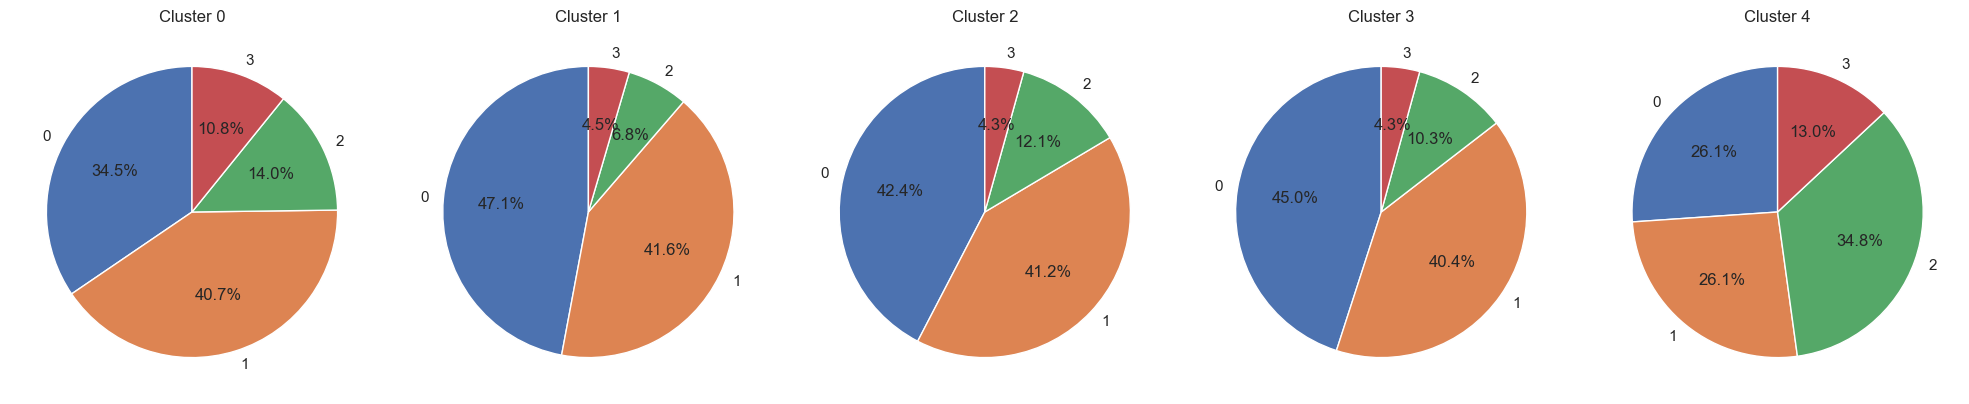

In [25]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'StockOptionLevel']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

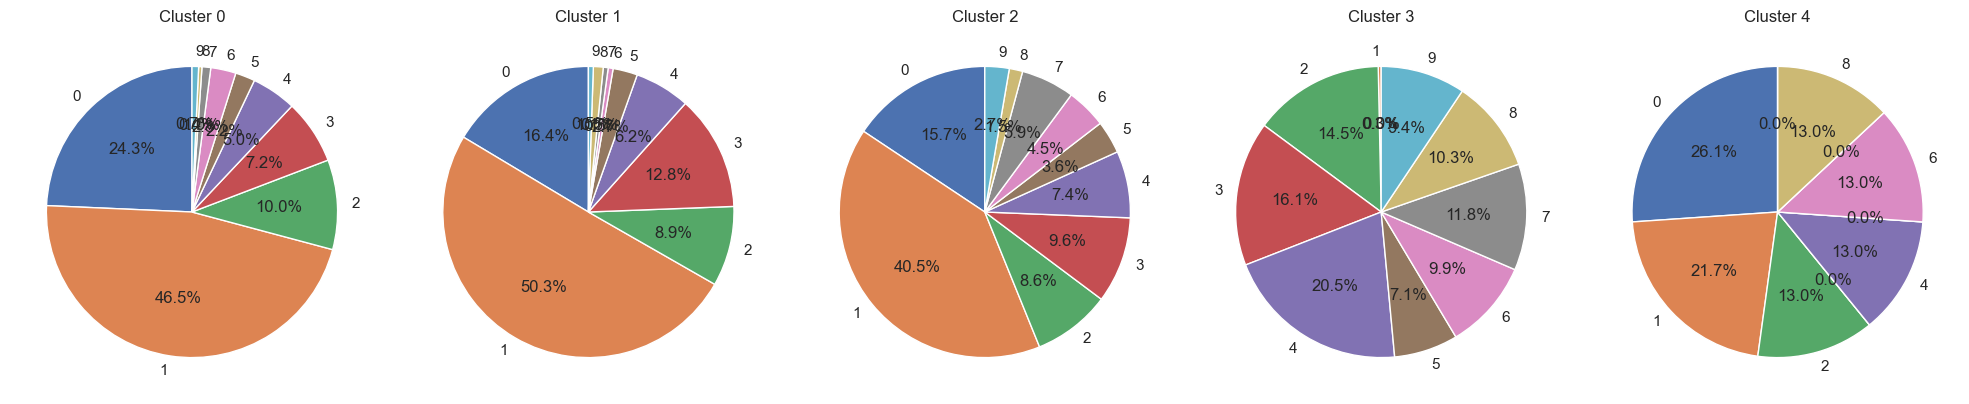

In [26]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'NumCompaniesWorked']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

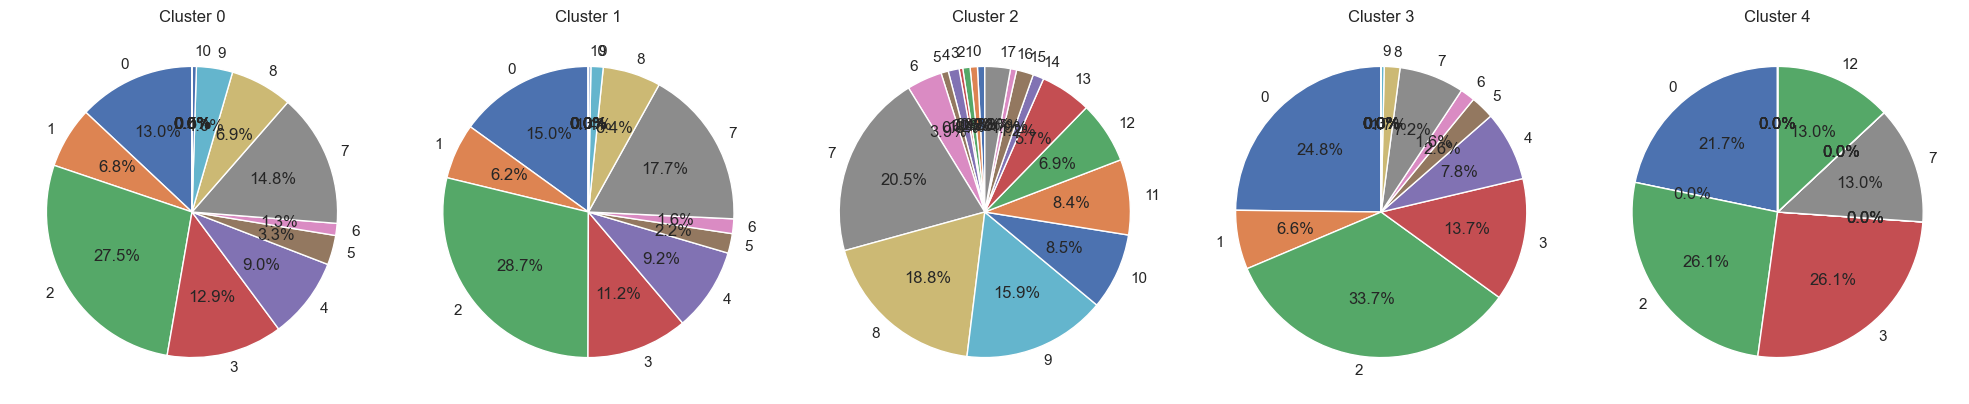

In [27]:
# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Agrupar los datos por 'Cluster' y 'EducationField', y contar las ocurrencias
grouped = df_merged.groupby(['Cluster', 'YearsWithCurrManager']).size().unstack()

# Iterar sobre cada cluster y graficar un gráfico de torta
for i, (cluster, data) in enumerate(grouped.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

### Grafico variables relevantes para el análisis de datos

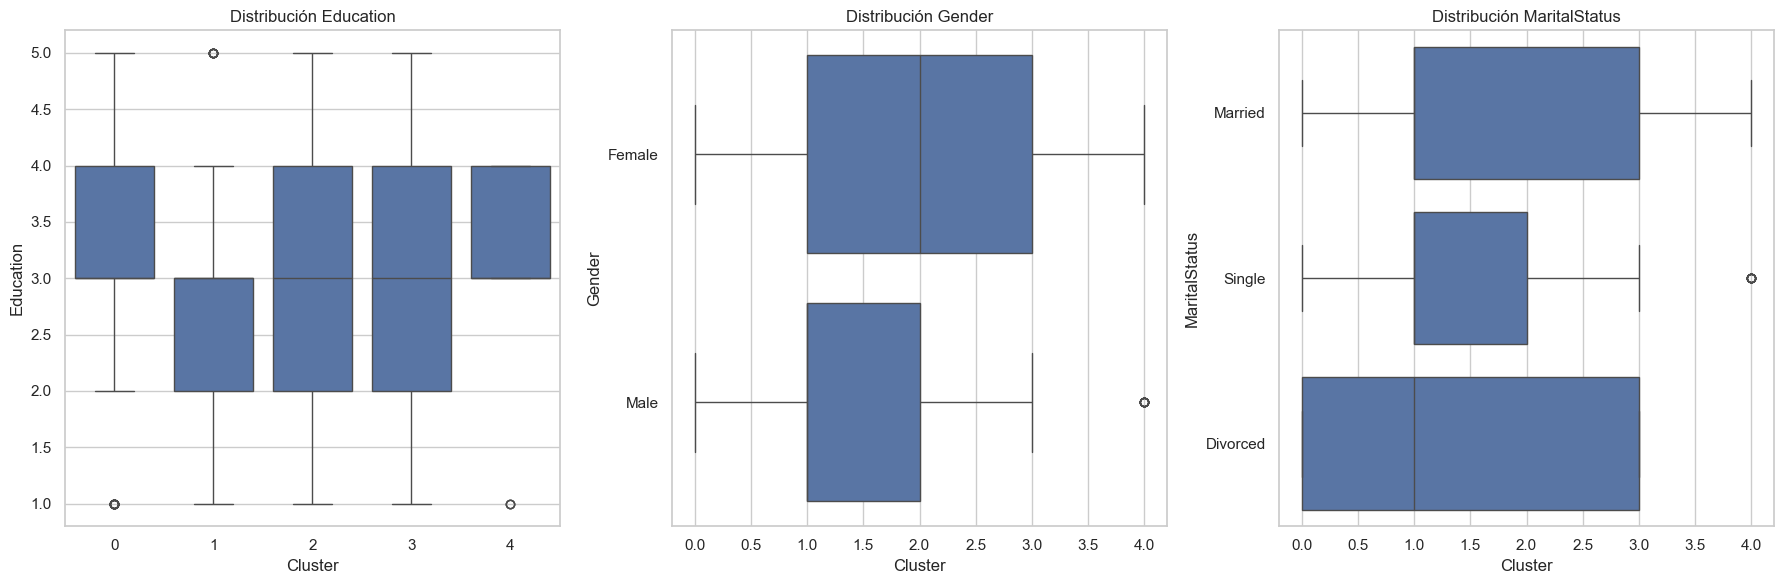

In [19]:
# Configurar el estilo de las gráficas de Seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para las tres gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el boxplot de 'PercentSalaryHike'
sns.boxplot(x='Cluster', y='Education', data=df_merged, ax=axes[0])
axes[0].set_title('Distribución Education')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Education')

# Graficar el boxplot de 'EnvironmentSatisfaction'
sns.boxplot(x='Cluster', y='Gender', data=df_merged, ax=axes[1])
axes[1].set_title('Distribución Gender')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Gender')

# Graficar el boxplot de 'TrainingTimesLastYear'
sns.boxplot(x='Cluster', y='MaritalStatus', data=df_merged, ax=axes[2])
axes[2].set_title('Distribución MaritalStatus')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('MaritalStatus')

plt.tight_layout()
plt.show()

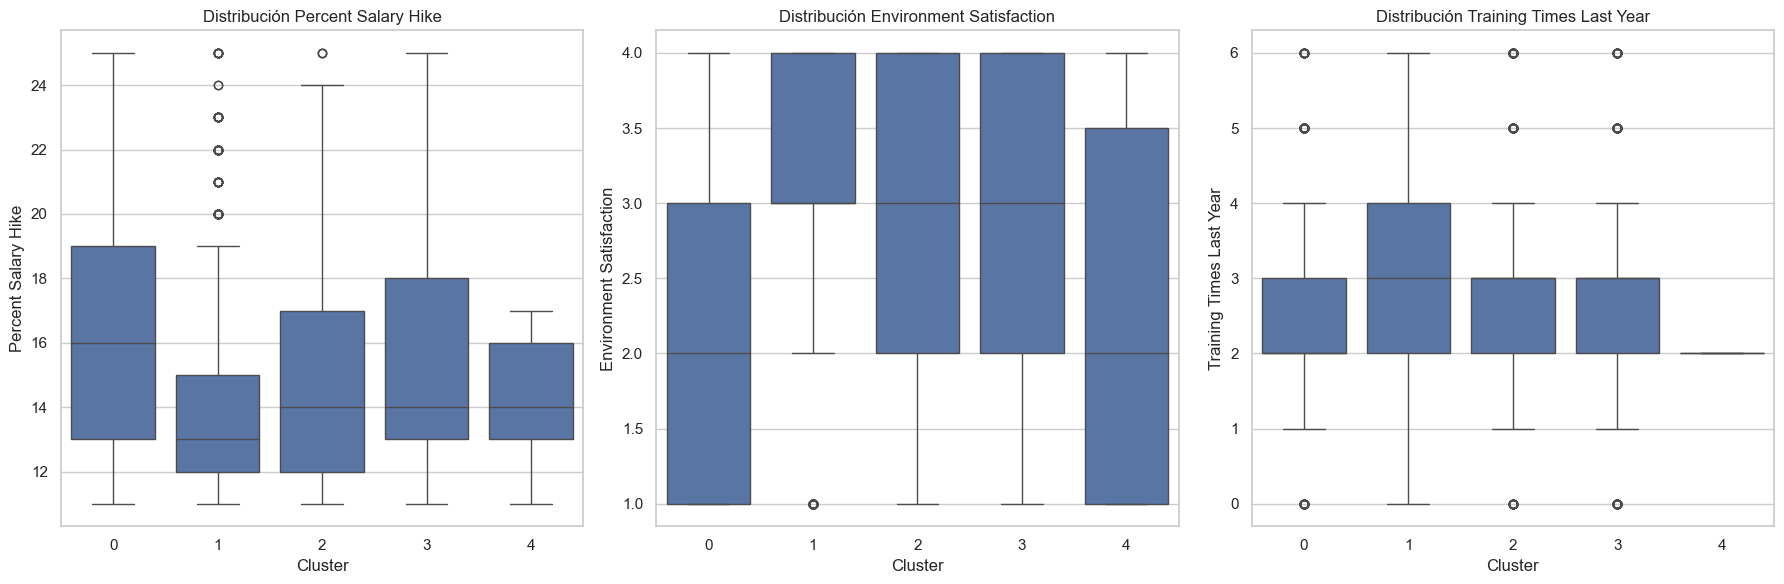

In [16]:
# Configurar el estilo de las gráficas de Seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para las tres gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el boxplot de 'PercentSalaryHike'
sns.boxplot(x='Cluster', y='PercentSalaryHike', data=df_merged, ax=axes[0])
axes[0].set_title('Distribución Percent Salary Hike')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Percent Salary Hike')

# Graficar el boxplot de 'EnvironmentSatisfaction'
sns.boxplot(x='Cluster', y='EnvironmentSatisfaction', data=df_merged, ax=axes[1])
axes[1].set_title('Distribución Environment Satisfaction')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Environment Satisfaction')

# Graficar el boxplot de 'TrainingTimesLastYear'
sns.boxplot(x='Cluster', y='TrainingTimesLastYear', data=df_merged, ax=axes[2])
axes[2].set_title('Distribución Training Times Last Year')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Training Times Last Year')

plt.tight_layout()
plt.show()

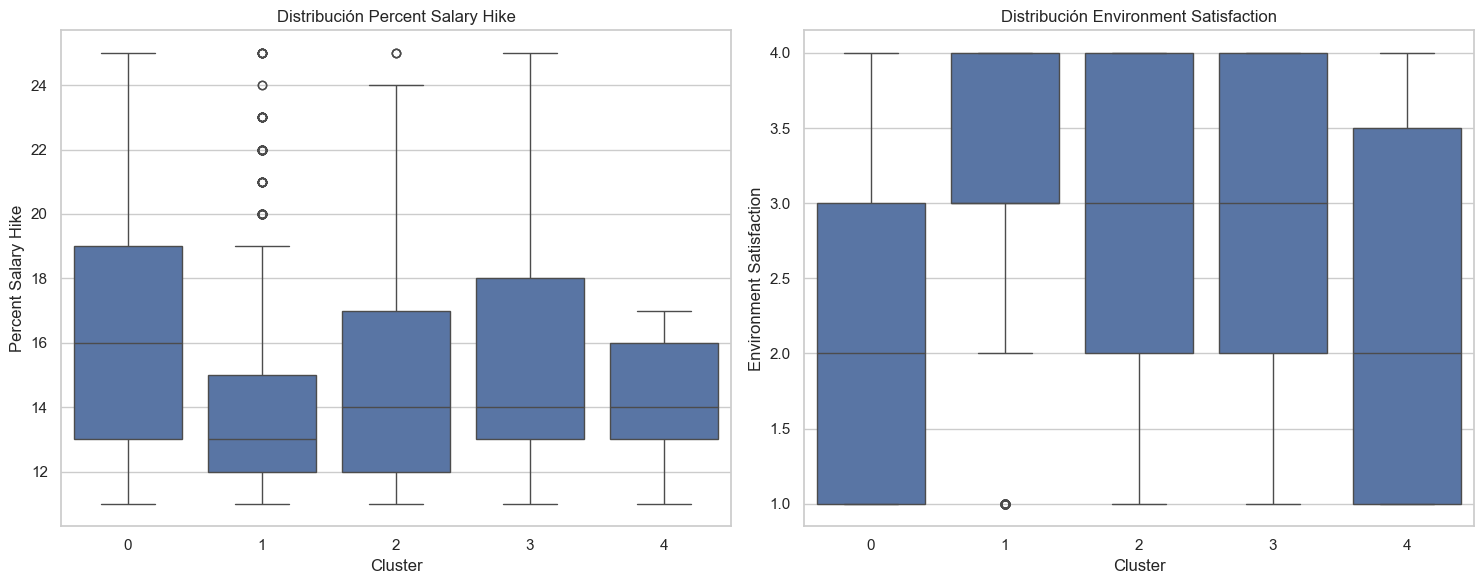

In [17]:
# Configurar el estilo de las gráficas de Seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para las dos gráficas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graficar el boxplot de 'PercentSalaryHike'
sns.boxplot(x='Cluster', y='PercentSalaryHike', data=df_merged, ax=axes[0])
axes[0].set_title('Distribución Percent Salary Hike')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Percent Salary Hike')

# Graficar el boxplot de 'EnvironmentSatisfaction'
sns.boxplot(x='Cluster', y='EnvironmentSatisfaction', data=df_merged, ax=axes[1])
axes[1].set_title('Distribución Environment Satisfaction')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Environment Satisfaction')

plt.tight_layout()
plt.show()

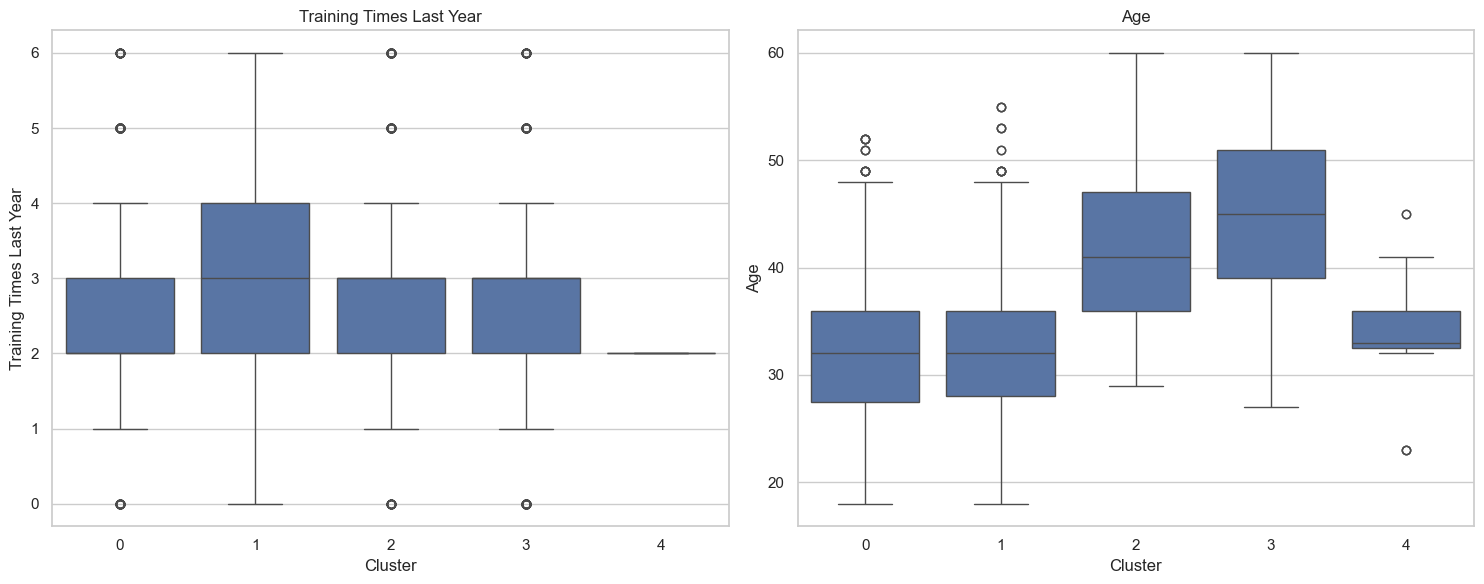

In [18]:
# Configurar el estilo de las gráficas de Seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para las dos gráficas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graficar el boxplot de 'PercentSalaryHike'
sns.boxplot(x='Cluster', y='TrainingTimesLastYear', data=df_merged, ax=axes[0])
axes[0].set_title('Training Times Last Year')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Training Times Last Year')

# Graficar el boxplot de 'EnvironmentSatisfaction'
sns.boxplot(x='Cluster', y='Age', data=df_merged, ax=axes[1])
axes[1].set_title('Age')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()